In [125]:
from google.colab import files


uploaded = files.upload()

Saving PROJECT.csv to PROJECT.csv


In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances

In [128]:
data = pd.read_csv("PROJECT.csv", delimiter=",", header=0)
data

,City,city_population,density,pct_men,pct_women,pct_hispanic,pct_white,pct_black,pct_native,pct_asian,...,LTM_min_temp,LTM_max_temp,age29andunder_pct,age65andolder_pct,rural_pct,ruralurban_cc,rep_pct,dem_pct,crime_per_100,avg_propty_tax
0,"New York, New York",8336817,10715,47.291425,52.708575,26.1,46.8,12.5,0.1,11.9,...,48.6,64.1,36.439695,14.383705,0.000000,1,9.706266,86.556921,0.036231,11811.008190
1,"Los Angeles, California",3979576,3276,49.275460,50.724540,48.4,26.5,7.9,0.2,14.3,...,51.4,74.4,41.340548,12.202278,0.605218,1,22.413336,71.757222,0.053825,6782.028673
2,"Long Beach, California",462628,3523,49.275460,50.724540,48.4,26.5,7.9,0.2,14.3,...,51.4,74.4,41.340548,12.202278,0.605218,1,22.413336,71.757222,0.066151,6782.028673
3,"Santa Clarita, California",212979,1162,49.275460,50.724540,48.4,26.5,7.9,0.2,14.3,...,51.4,74.4,41.340548,12.202278,0.605218,1,22.413336,71.757222,0.029470,6782.028673
4,"Glendale, California",199303,2525,49.275460,50.724540,48.4,26.5,7.9,0.2,14.3,...,51.4,74.4,41.340548,12.202278,0.605218,1,22.413336,71.757222,0.035725,6782.028673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,"Battle Creek, Michigan",51093,463,48.874761,51.125239,5.0,78.3,10.6,0.6,2.1,...,40.5,58.3,38.364107,16.316606,30.977039,3,53.468473,41.012190,0.080781,4082.319040
697,"Florissant, Missouri",50952,1567,47.432867,52.567133,2.8,66.9,23.7,0.2,4.0,...,46.4,65.9,37.622531,16.470077,1.137990,1,39.318414,55.686034,0.046894,4874.699159
698,"Joplin, Missouri",50925,515,48.677883,51.322117,7.7,84.7,2.1,1.4,1.1,...,46.9,68.0,42.184092,13.829062,23.691697,3,72.569631,21.876423,0.143410,1990.127907
699,"Enid, Oklahoma",49688,259,49.545826,50.454174,11.6,75.8,3.0,1.8,0.8,...,47.3,71.2,41.764696,15.415886,21.411357,5,73.740212,20.253339,0.075323,2540.766614


In [130]:
X_data = data.iloc[:, range(1,45)]
columns_data = data.iloc[:, range(1,45)].columns

In [131]:
scaler = MinMaxScaler()
X_data = scaler.fit(X_data).transform(X_data)

In [132]:
pca_data = PCA(n_components=2).fit(X_data)

In [133]:
pca_data.explained_variance_

array([0.25934841, 0.2177186 ])

In [134]:
pca_data.explained_variance_ratio_

array([0.24089633, 0.20222839])

In [135]:
round(pd.DataFrame(pca_data.components_.T,
             index = columns_data,
             columns = ["PCA1", "PCA2"]),3)

,PCA1,PCA2
city_population,-0.012,0.009
density,-0.059,0.062
pct_men,0.007,-0.005
pct_women,-0.007,0.005
pct_hispanic,-0.256,-0.134
pct_white,0.372,0.088
pct_black,-0.038,-0.047
pct_native,0.017,-0.011
pct_asian,-0.205,0.221
pct_pacific,-0.032,0.028


In [136]:
X_data_pca = pca_data.transform(X_data)

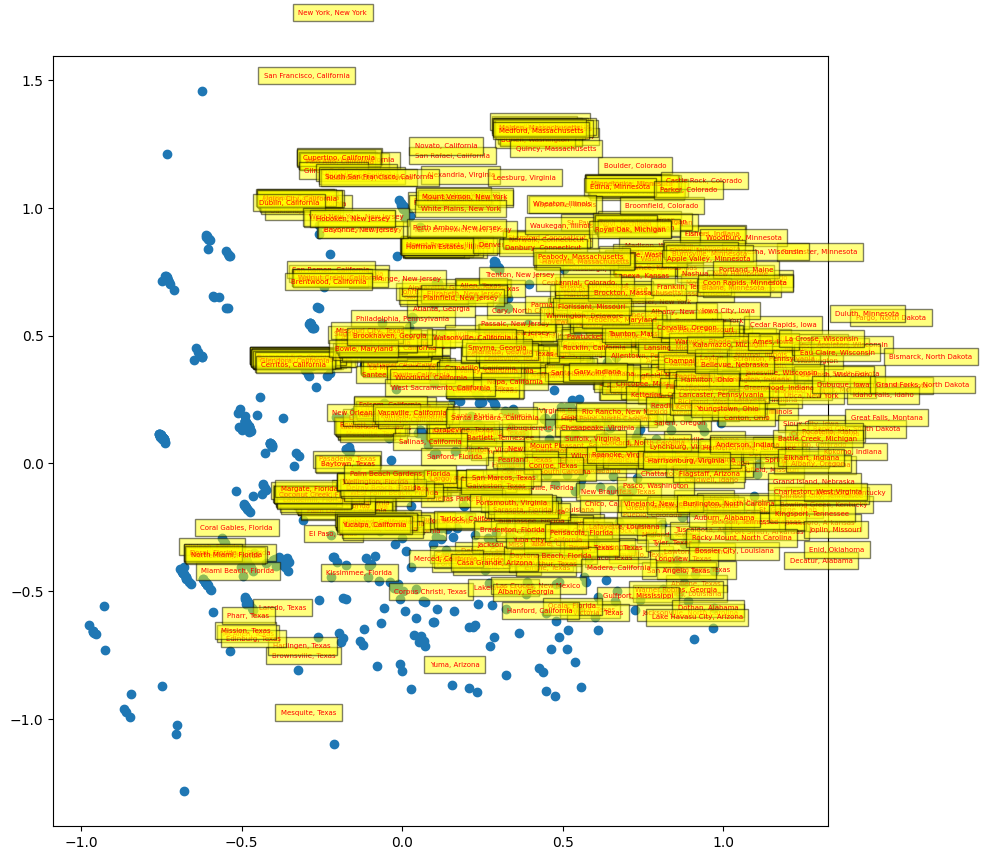

In [137]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_data_pca[:,0],X_data_pca[:,1])
for i in range(X_data.shape[0]):
  plt.text(x=X_data_pca[i,0]+0.3,y=X_data_pca[i,1]+0.3,s=data["City"][i],
           fontdict=dict(color='red',size=5),
           bbox=dict(facecolor='yellow',alpha=0.5))
plt.show()

In [138]:
def pca_biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

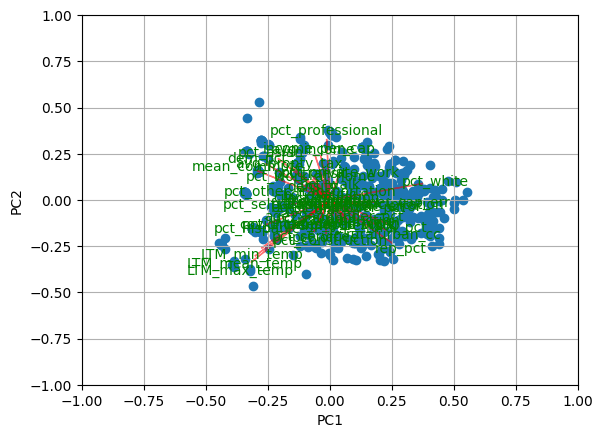

In [139]:
pca_biplot(X_data_pca,
           np.transpose(pca_data.components_),
           columns_data)
plt.show()

In [140]:
pca_data = PCA().fit(X_data)
np.cumsum(pca_data.explained_variance_ratio_)

array([0.24089633, 0.44312472, 0.55297909, 0.6316811 , 0.7037492 ,
       0.73999896, 0.77288723, 0.8039051 , 0.82852072, 0.84710231,
       0.86402734, 0.88001624, 0.89407468, 0.90627097, 0.91786509,
       0.92778195, 0.9362599 , 0.94370725, 0.95086082, 0.95662999,
       0.96221622, 0.96740587, 0.97212982, 0.97608846, 0.97938882,
       0.9822198 , 0.98501898, 0.98756414, 0.98978274, 0.99196922,
       0.99377668, 0.99542388, 0.99675003, 0.9977868 , 0.99858566,
       0.99931579, 0.99974184, 0.99998216, 0.99999667, 0.99999844,
       0.99999941, 0.99999974, 1.        , 1.        ])

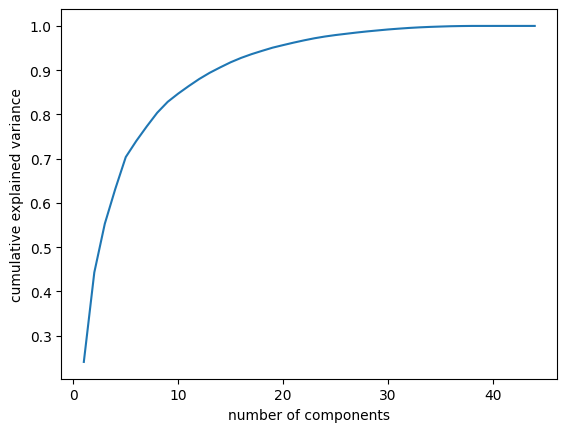

In [142]:
plt.plot(range(1,45),np.cumsum(pca_data.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [143]:
tsne = TSNE(n_components=2,perplexity=20,verbose=1, n_iter=2000)

In [144]:
tsne_results = tsne.fit_transform(X_data_pca)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 701 samples in 0.001s...
[t-SNE] Computed neighbors for 701 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 701 / 701
[t-SNE] Mean sigma: 0.025130
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.950443
[t-SNE] KL divergence after 2000 iterations: 0.296155


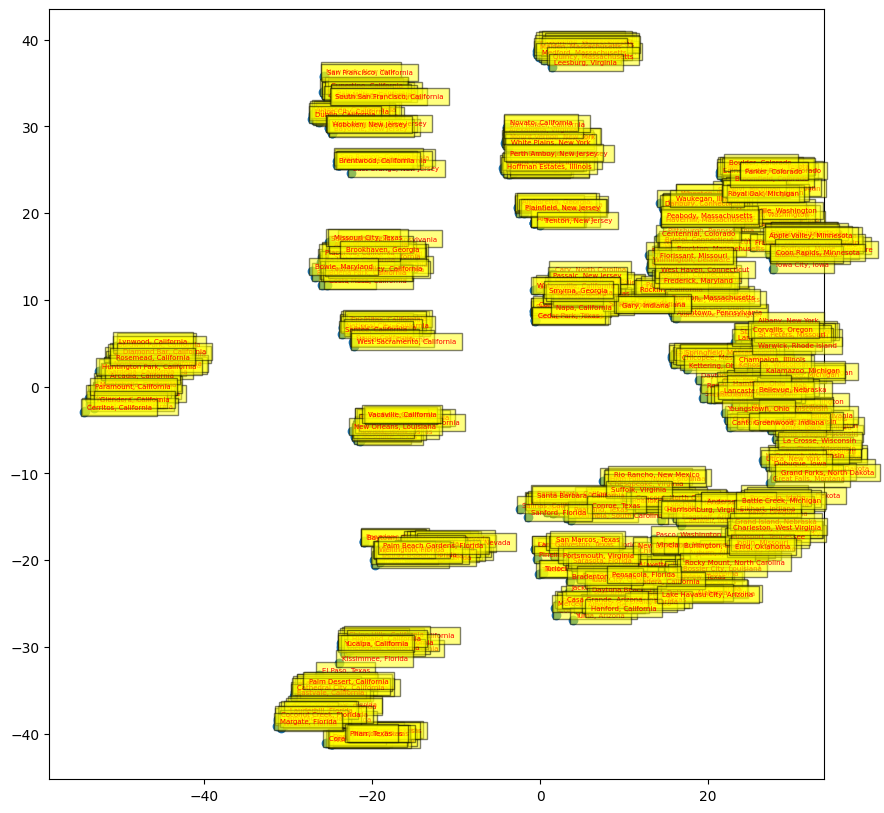

In [145]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(tsne_results[:,0], y= tsne_results[:,1])
for i in range(tsne_results.shape[0]):
  plt.text(x=tsne_results[i,0]+0.3,y=tsne_results[i,1]+0.3,s=data["City"][i],
           fontdict=dict(color='red',size=5),
           bbox=dict(facecolor='yellow',alpha=0.5))
plt.show()

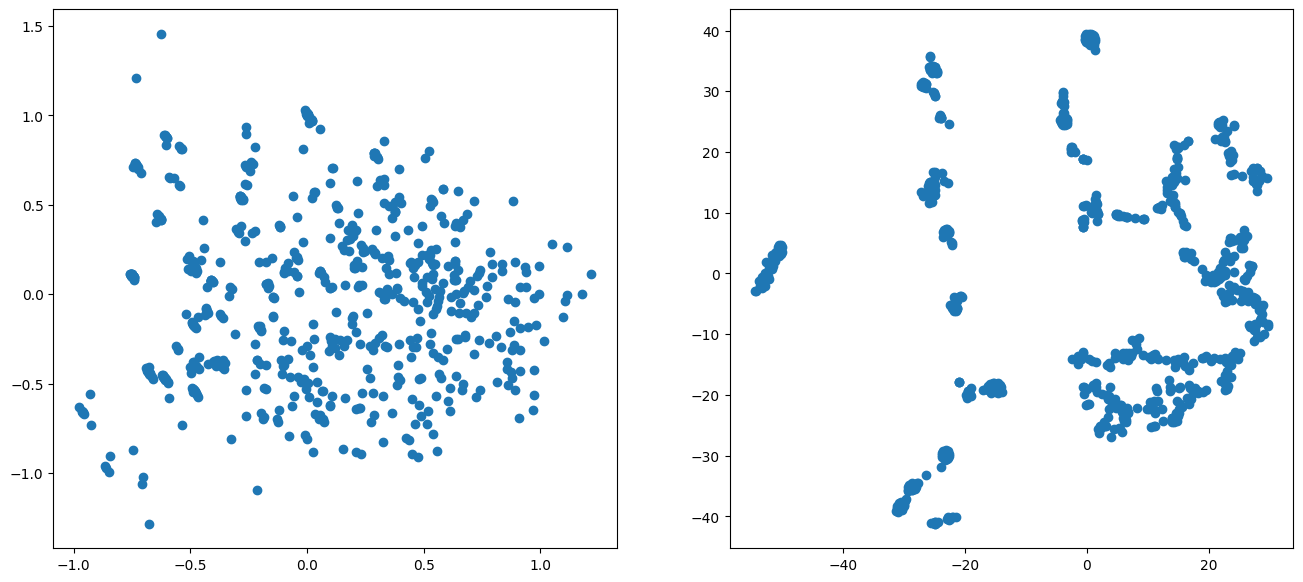

In [146]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
plt.scatter(X_data_pca[:,0],X_data_pca[:,1])
ax2 = plt.subplot(1, 2, 2)
plt.scatter(tsne_results[:,0], y= tsne_results[:,1])

In [147]:


# Assuming 'embedding' is your t-SNE embedding, obtained as described above

# Calculate pairwise distances between points in the embedding
distances = euclidean_distances(tsne_results)

# Find the index of the closest point (excluding itself) for each point
closest_points_indices = np.argmin(distances + np.eye(len(tsne_results)) * np.max(distances), axis=1)

# Optionally, you can also find the distances to the closest points
closest_distances = np.min(distances + np.eye(len(tsne_results)) * np.max(distances), axis=1)

# Now 'closest_points_indices[i]' contains the index of the closest point (excluding itself) to the ith point,
# and 'closest_distances[i]' contains the distance to the closest point



In [148]:
# Assuming 'embedding' is your t-SNE embedding, obtained as described above
# Assuming 'closest_points_indices' and 'closest_distances' are obtained using the code snippet provided earlier

# Print the index of the closest point and its distance for each point in the embedding
for i, (closest_index, closest_distance) in enumerate(zip(closest_points_indices, closest_distances)):
    print(f"Point {i}: Closest point index: {closest_index}, Distance: {closest_distance}")


Point 0: Closest point index: 112, Distance: 0.1822376400232315
Point 1: Closest point index: 12, Distance: 0.485710084438324
Point 2: Closest point index: 18, Distance: 0.2849881649017334
Point 3: Closest point index: 35, Distance: 0.3358704149723053
Point 4: Closest point index: 35, Distance: 0.3672897517681122
Point 5: Closest point index: 22, Distance: 0.4406420588493347
Point 6: Closest point index: 19, Distance: 0.3589872121810913
Point 7: Closest point index: 22, Distance: 0.346667617559433
Point 8: Closest point index: 36, Distance: 0.3866710960865021
Point 9: Closest point index: 13, Distance: 0.2811017632484436
Point 10: Closest point index: 14, Distance: 0.3429829776287079
Point 11: Closest point index: 32, Distance: 0.3614334166049957
Point 12: Closest point index: 1, Distance: 0.485710084438324
Point 13: Closest point index: 9, Distance: 0.2811017632484436
Point 14: Closest point index: 10, Distance: 0.3429829776287079
Point 15: Closest point index: 19, Distance: 0.3749770